In [95]:
# Predicting Titanic survivors
# Importing all necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import klib

from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [96]:
# Loading the datasets. Training the model using TRAINING dataset & test model / predict using TEST dataset.

train_df = pd.read_csv('titanic_train.csv')  
test_df = pd.read_csv('titanic_test.csv')  

# Getting info about the TRAIN dataframe
train_df.info()

# Result analysis: The training-set has 891 rows and 11 features + the TARGET VARIABLE (SURVIVED). 
# 2 of the features are floats, 5 are integers and 5 are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
# Getting info about the TEST dataframe
test_df.info()

# Result analysis: The test-set has 418 rows and 11 features, EXCLUDING the TARGET VARIABLE (SURVIVED). 
# 2 of the features are floats, 5 are integers and 5 are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [98]:
# EDA / Exploratory Data Analysis
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [99]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S,1


In [100]:
train_df.describe()

# Conclusions from .describe() EDA below

# About 38% out of the training-set survived the Titanic.
# Passengers 'Age' range from 0.4 to 80 years old.
# 'Age' has missing values, (714 out of 891 total).

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [101]:
# Created table to see isnull.sum in descending order
total = train_df.isnull().sum().sort_values(ascending=False)

# Created column to visualise the percentage of isnull.sum 
# So that, it's easier to decide whether it's worth working with the missing data or drop them)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(14)

# CONCLUSION from table:
# 'Embarked' has 2 missing values, which can easily be filled or dropped. 
# It will be much more trickier to deal with the ‘Age’ feature, which has 177 missing values (about 20%) 
# The ‘Cabin’ feature needs further investigation, but I choose to drop it from the dataset since 77% is missing.

,Total,%
Cabin,687,77.10
Age,177,19.90
Embarked,2,0.20
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [102]:
# The training set consist of passengers SURVIVAL status, gender, class, fare and pclass. these are used to create the machine learning model.

# The test set will be used to see how well the model performs on unseen data. The test set does not provide passengers survival status. 
# We are going to use our model to predict passenger survival status.

# This is a CLASSIFICATION problem. Because the target is a categorical variable.

In [103]:
train_df.columns.values # finding out the columns array

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [104]:
# EDA / Exploratory Data Analysis & Data Cleaning with klib
# Data cleaning function
# This function drops empty & single valued columns as well as empty & duplicate rows 
train_df_cleaned = klib.data_cleaning(train_df)

Shape of cleaned data: (891, 12) - Remaining NAs: 866


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.05 MB (-62.5%)



<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

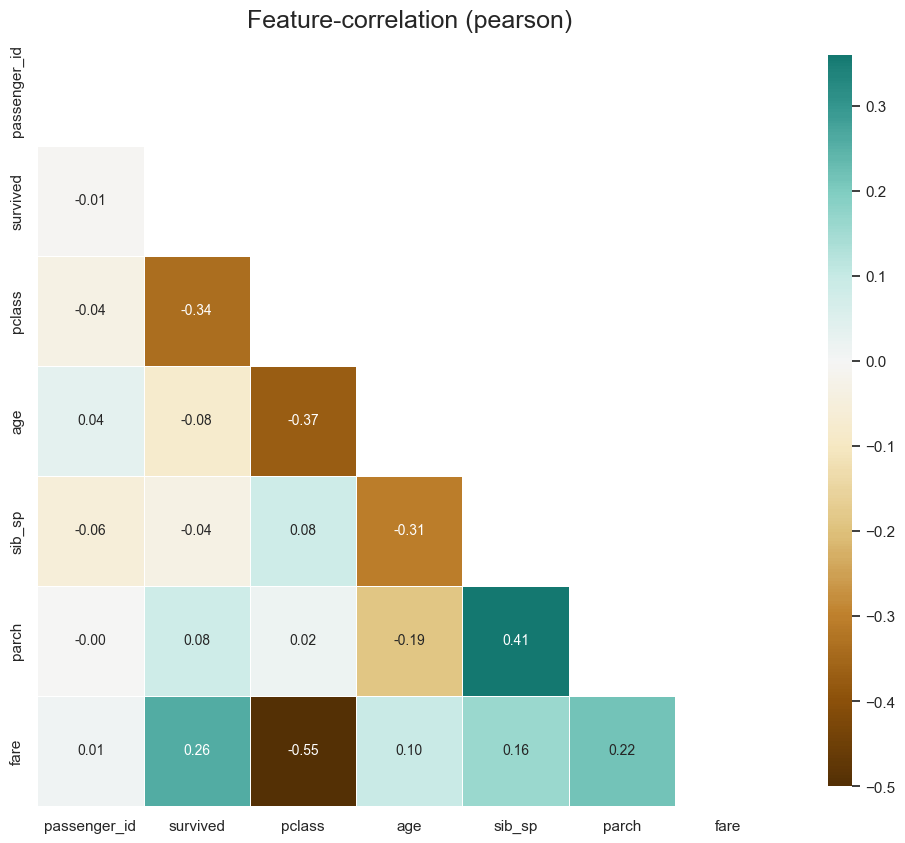

In [105]:
# Correlation plot
klib.corr_plot(train_df_cleaned, annot = True)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

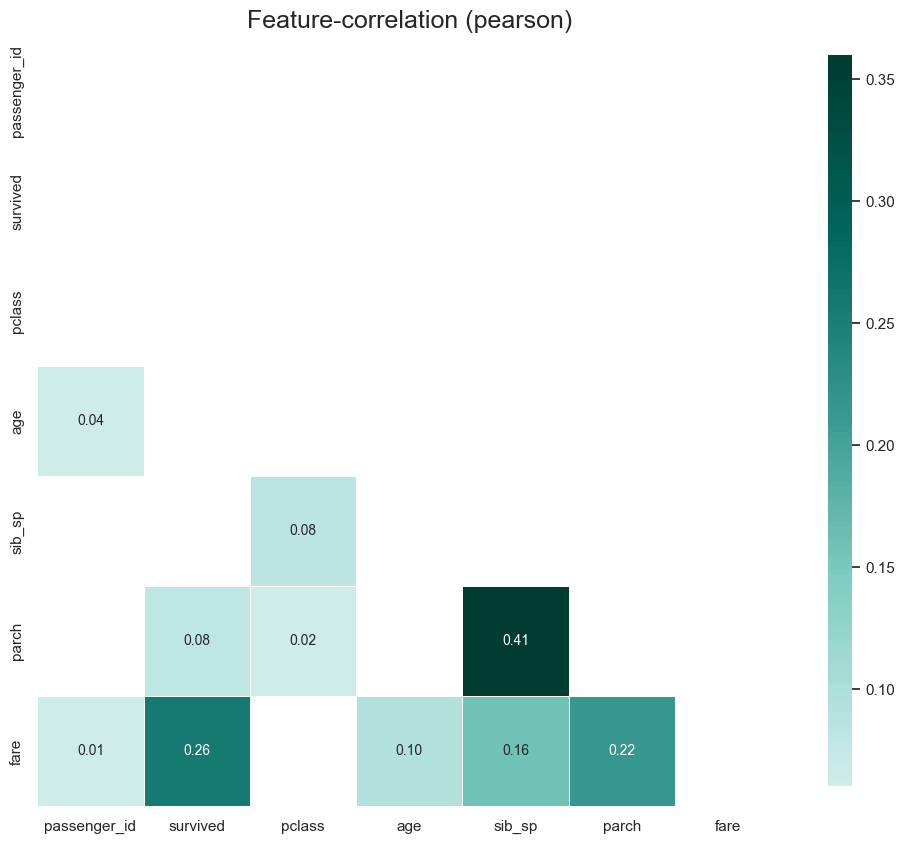

In [106]:
# Display only positive correlation.

klib.corr_plot(train_df_cleaned, split = "pos", annot = True)

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

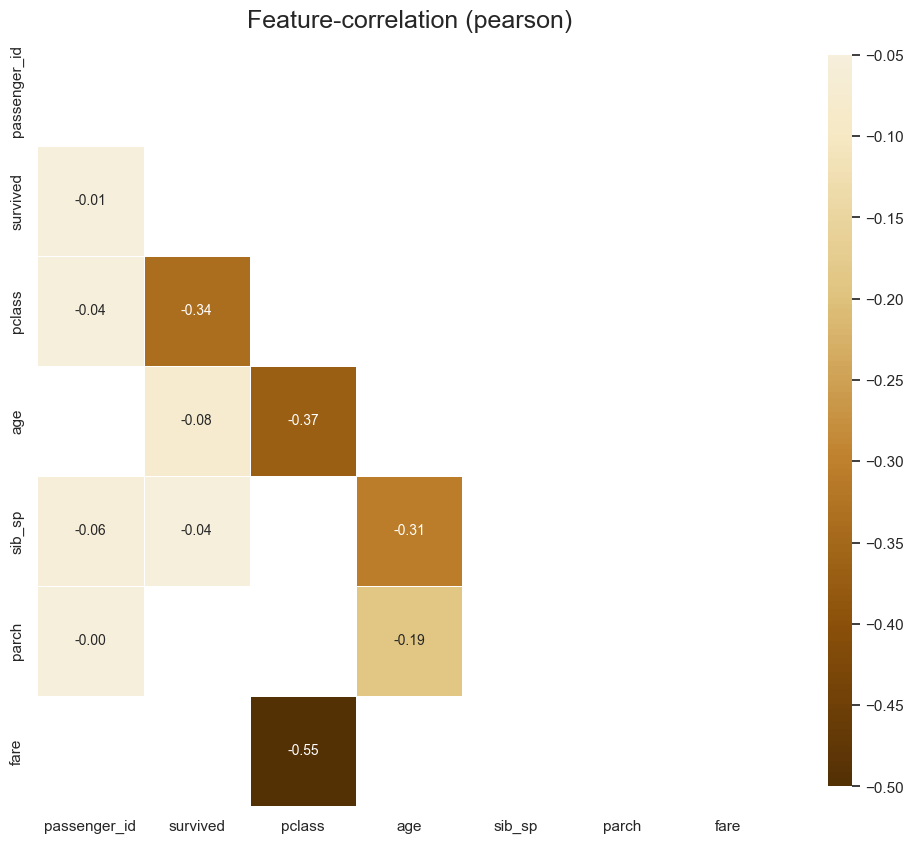

In [107]:
# Display only negative correlation.

klib.corr_plot(train_df_cleaned, split = "neg", annot = True)

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

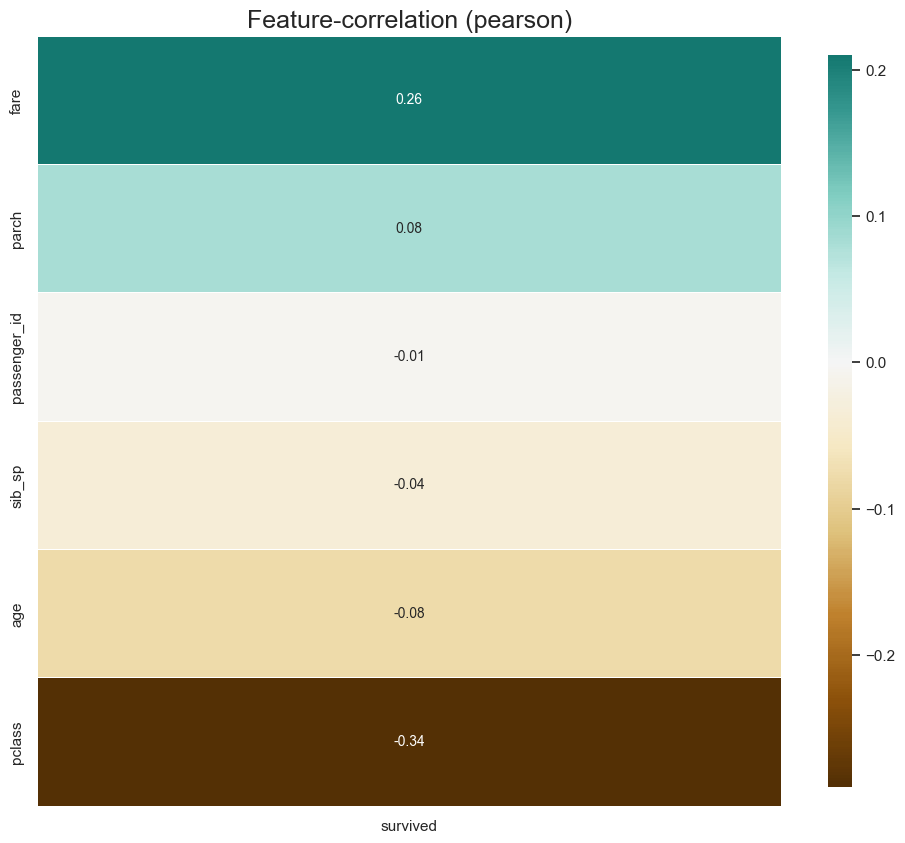

In [108]:
# Display correlation with a target variable of interest (SURVIVED)

klib.corr_plot(train_df_cleaned, target = "survived")

In [109]:
# Display correlation data matrix to see real values

klib.corr_mat(train_df)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


In [110]:
train_df_cleaned.head()

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,<NA>,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.93,<NA>,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,<NA>,S


In [111]:
train_df_cleaned[train_df_cleaned['fare']>300]

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.33,<NA>,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.33,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.33,B101,C


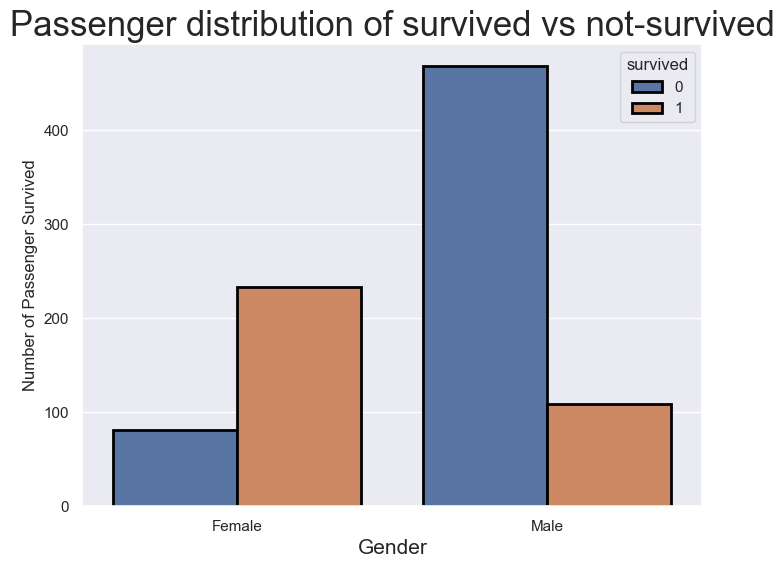

In [112]:
# Bar plot to see relation between gender & survived number

sns.set(style='darkgrid')
plt.subplots(figsize = (8,6))
ax=sns.countplot(x='sex', data = train_df_cleaned, hue='survived', edgecolor=(0,0,0), linewidth=2)

# Fixing title, xlabel and ylabel
plt.title('Passenger distribution of survived vs not-survived', fontsize=25)
plt.xlabel('Gender', fontsize=15)
plt.ylabel("Number of Passenger Survived", fontsize = 12)
labels = ['Female', 'Male']

# Fixing xticks.
plt.xticks(sorted(train_df_cleaned.survived.unique()),labels);

In [113]:
train_df_cleaned.groupby(['sex']).mean()

#74% female survived vs 19% male survived

,passenger_id,survived,pclass,age,sib_sp,parch,fare
sex,,,,,,,
female,431.03,0.74,2.16,27.92,0.69,0.65,44.48
male,454.15,0.19,2.39,30.73,0.43,0.24,25.52


In [114]:
train_df_cleaned.groupby(['sex','pclass']).mean()

# Looking at relation between Sex & Ticket Class (pclass)

passenger_id  survived   age  sib_sp  parch   fare
sex    pclass                                                    
female 1             469.21      0.97 34.61    0.55   0.46 106.13
       2             443.11      0.92 28.72    0.49   0.61  21.97
       3             399.73      0.50 21.75    0.90   0.80  16.12
male   1             455.73      0.37 41.28    0.31   0.28  67.23
       2             447.96      0.16 30.74    0.34   0.22  19.74
       3             455.52      0.14 26.51    0.50   0.22  12.66

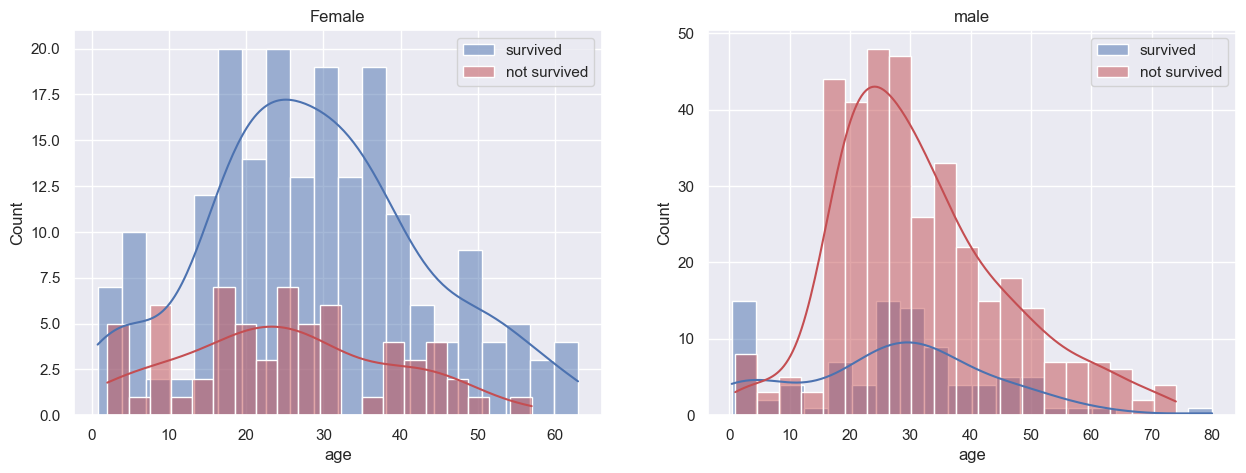

In [115]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

women = train_df_cleaned[train_df_cleaned['sex']=='female']
men = train_df_cleaned[train_df_cleaned['sex']=='male']

# Plot Female Survived vs Not-Survived distribution
ax = sns.histplot(women[women['survived']==1].age.dropna(), bins=20, label = survived, ax = axes[0],color='b', kde=True)
ax = sns.histplot(women[women['survived']==0].age.dropna(), bins=20, label = not_survived, ax = axes[0],color='r', kde=True)
ax.legend()
ax.set_title('Female')

# Plot Male Survived vs Not-Survived distribution
ax = sns.histplot(men[men['survived']==1].age.dropna(), bins=20, label = survived, ax = axes[1],color='b', kde=True)
ax = sns.histplot(men[men['survived']==0].age.dropna(), bins=20, label = not_survived, ax = axes[1],color='r', kde=True)
ax.legend()
ax.set_title('male');

# conclusion: Infants & children have highest probability of survival
# Men between 18-35 have higher probability of survival. Women between 15-40 years old have higher probability of survival.
# Men between 5-18 years & above 35 years old have low probability of survival. 


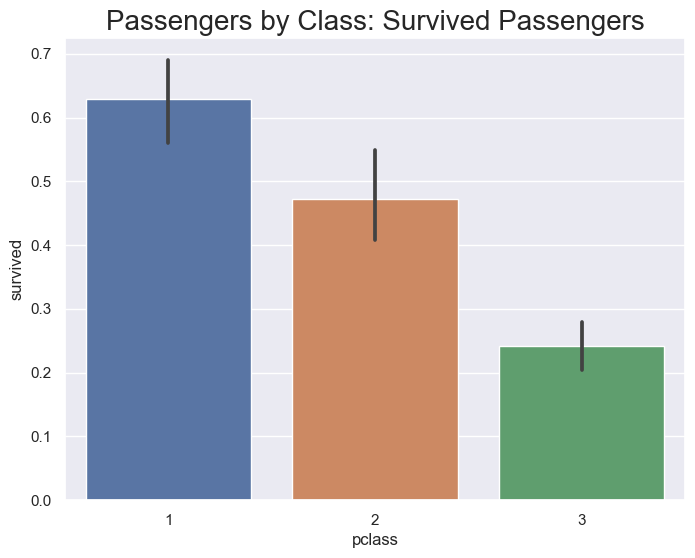

In [116]:
plt.subplots(figsize = (8,6))
sns.barplot(x='pclass', y='survived', data=train_df_cleaned);
plt.title("Passengers by Class: Survived Passengers", fontsize = 20);

# CONCLUSION from 3 plots below: 
# 1. Economic status (Pclass) played an important role. Higher class has higher probability of survival. 
# 2. First class passengers had a much higher chance of survival than passengers in the 3rd class. 

# 63% of the 1st class passengers survived the Titanic wreck
# 48% of the 2nd class passengers survived
# Only 24% of the 3rd class passengers survived

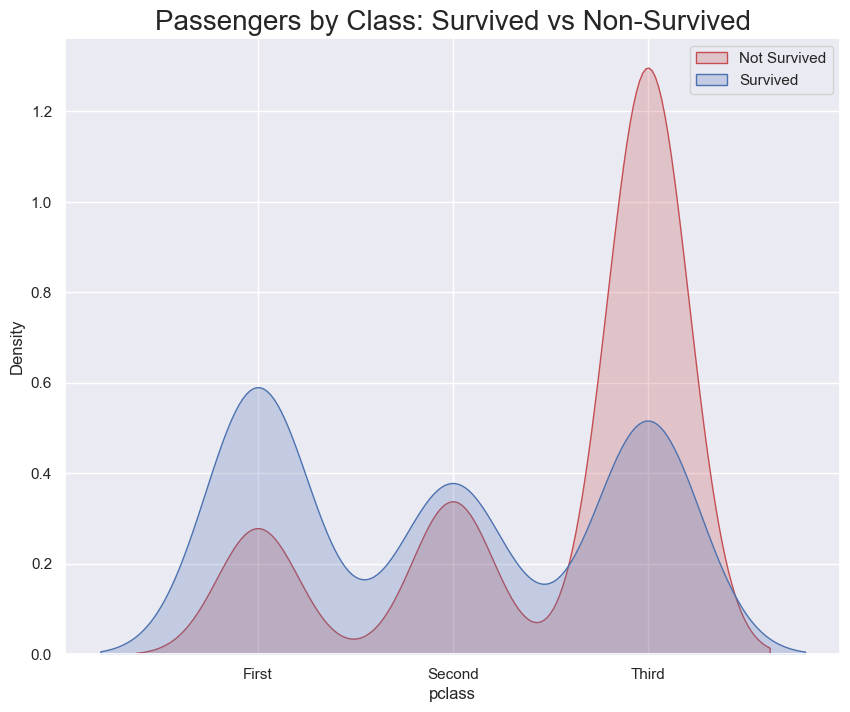

In [117]:
plt.subplots(figsize=(10,8))
ax=sns.kdeplot(train_df_cleaned.loc[(train_df_cleaned['survived'] == 0),'pclass'],shade=True,color='r',label='Not Survived')
ax.legend()
ax=sns.kdeplot(train_df_cleaned.loc[(train_df_cleaned['survived'] == 1),'pclass'],shade=True,color='b',label='Survived')
ax.legend()

plt.title("Passengers by Class: Survived vs Non-Survived", fontsize = 20)
labels = ['First', 'Second', 'Third']
plt.xticks(sorted(train_df_cleaned.pclass.unique()),labels);

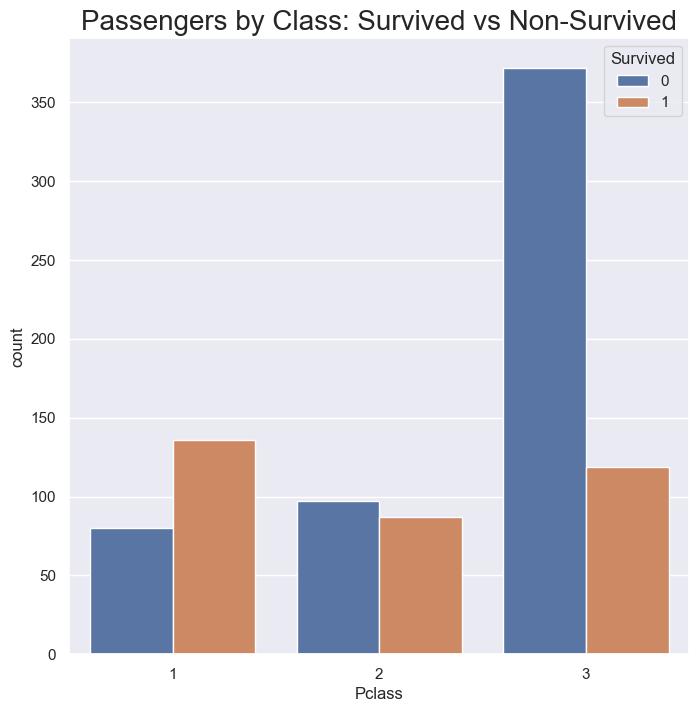

In [118]:
plt.subplots(figsize = (8,8))
ax=sns.countplot(x='Pclass',hue='Survived',data=train_df)
plt.title("Passengers by Class: Survived vs Non-Survived", fontsize = 20);

In [119]:
# Handling missing values
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

train_df["Age"].isnull().sum()

0

In [120]:
common_value = 'S'
data = [train_df, test_df]

# replace Embarked missing value with Most common (S = Southampton)
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value) 

train_df['Embarked'].isnull().sum()

0

In [121]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int) # converting fare from float to int

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int32 
 10  Cabin        204 non-null    object
 11  Embarked     891 non-null    object
dtypes: int32(2), int64(5), object(5)
memory usage: 76.7+ KB


In [122]:
# Assigning 0 to male & 1 to female
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,NaN,S


In [123]:
# Drop / remove columns Ticket, Name & Embarked from both TRAIN & TEST dataset. 
# Because the values do not contribute to probability of SURVIVAL
train_df = train_df.drop(['Ticket', 'Name', 'Embarked', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Name', 'Embarked', 'Cabin'], axis=1)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22,1,0,7
1,2,1,1,1,38,1,0,71
2,3,1,3,1,26,0,0,7
3,4,1,1,1,35,1,0,53
4,5,0,3,0,35,0,0,8


In [124]:
# Drop SURVIVED column from X to start building training model
X  = train_df.drop(['Survived'], axis=1)
X


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22,1,0,7
1,2,1,1,38,1,0,71
2,3,3,1,26,0,0,7
3,4,1,1,35,1,0,53
4,5,3,0,35,0,0,8
...,...,...,...,...,...,...,...
886,887,2,0,27,0,0,13
887,888,1,1,19,0,0,30
888,889,3,1,19,1,2,23
889,890,1,0,26,0,0,30


In [125]:
# our TARGET column 'SURVIVED' assigned as y to build our training model
y = train_df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [142]:
# Building Logistic Regression model. 80/20 split. Class weight = Balanced

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
logisticReg = LogisticRegression(class_weight = 'balanced')
logisticReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [143]:
# Prediction on TRAIN DATASET using Logistic Regression model (as instructed for this assignment)
# Showing confusion matrix result. 

y_pred = logisticReg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[97, 14],
       [18, 50]], dtype=int64)

In [130]:
# Using LazyPredict Regressor to find the best regression model for the problem.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
reg = LazyRegressor(verbose=0,ignore_warnings=True,
custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 42/42 [00:18<00:00,  2.24it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.48,0.50,0.34,0.84
ExtraTreesRegressor,0.48,0.50,0.34,0.34
LGBMRegressor,0.48,0.50,0.35,0.11
RandomForestRegressor,0.47,0.49,0.35,0.37
GradientBoostingRegressor,0.45,0.48,0.35,0.18
AdaBoostRegressor,0.45,0.47,0.35,0.06
MLPRegressor,0.44,0.46,0.36,0.54
BaggingRegressor,0.43,0.46,0.36,0.06
KNeighborsRegressor,0.42,0.44,0.36,0.02


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'HistGradientBoostingRegressor'),
  Text(1, 0, 'ExtraTreesRegressor'),
  Text(2, 0, 'LGBMRegressor'),
  Text(3, 0, 'RandomForestRegressor'),
  Text(4, 0, 'GradientBoostingRegressor'),
  Text(5, 0, 'AdaBoostRegressor'),
  Text(6, 0, 'MLPRegressor'),
  Text(7, 0, 'BaggingRegressor'),
  Text(8, 0, 'KNeighborsRegressor'),
  Text(9, 0, 'XGBRegressor'),
  Text(10, 0, 'SGDRegressor'),
  Text(11, 0, 'TransformedTargetRegressor'),
  Text(12, 0, 'Lars'),
  Text(13, 0, 'LinearRegression'),
  Text(14, 0, 'Ridge'),
  Text(15, 0, 'LassoLarsIC'),
  Text(16, 0, 'RidgeCV'),
  Text(17, 0, 'BayesianRidge'),
  Text(18, 0, 'LassoCV'),
  Text(19, 0, 'ElasticNetCV'),
  Text(20, 0, 'LassoLarsCV'),
  Text(21, 0, 'LarsCV'),
  Text(22, 0, 'OrthogonalMatchingPursuitCV'),
  Text(23, 0, 'SVR'),
  Text(24, 0, 'Tweedi

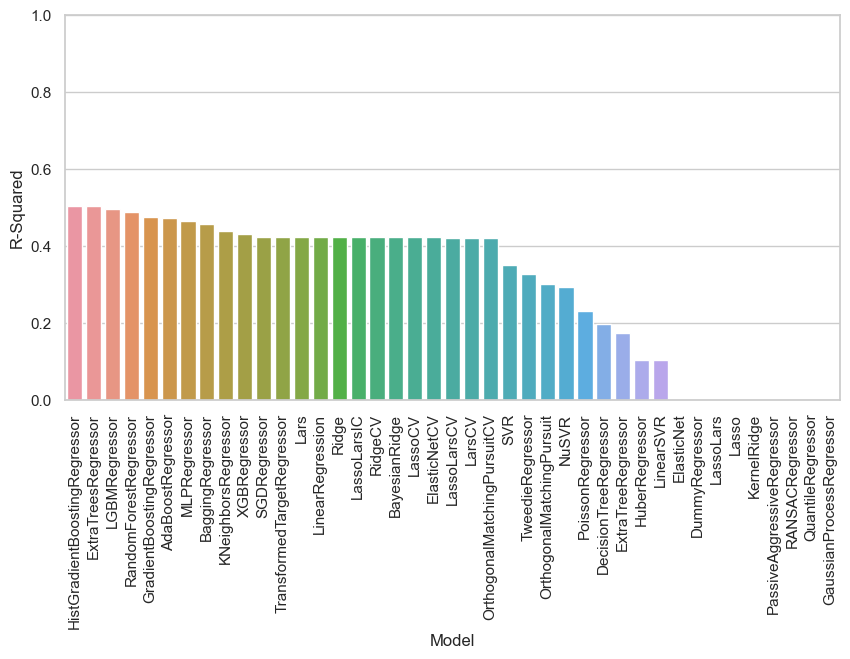

In [137]:
# Plot to show regression models with their score respectively. 
# CONCLUSION: Regressions, including logistic regression is not the most suitable model for this task. 
# Classifiers are much more suited to this task.

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models.index, y="R-Squared", data=models)
ax.set(ylim=(0,1))
plt.xticks(rotation=90)

In [131]:
# Data split. for the TRAINING DATASET, we will use 80% for training & 20% for testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state =42)

In [132]:
# I choose to use LazyClassifier for this task to get the most suitable models for the problem to be solved.
# Then, I would further choose the top few models to do hyper parameter tuning to get higher accuracy
# Below is how I defined and built the lazyclassifier. using the most optimum standardised / generalised parameters tuning

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

# Prints the model performance
models_train

# 29 types of classifiers being used to develop the model and test their Accuracy levels.
#RESULT: 100% Accuracy on TRAIN DATASET

100%|██████████| 29/29 [00:02<00:00, 10.76it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:02<00:00, 13.94it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,1.00,1.00,0.38
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.03
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.03
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.34
XGBClassifier,1.00,1.00,1.00,1.00,0.15
LGBMClassifier,0.99,0.99,0.99,0.99,0.10
BaggingClassifier,0.98,0.98,0.98,0.98,0.07
LabelPropagation,0.96,0.95,0.95,0.96,0.07
LabelSpreading,0.96,0.95,0.95,0.96,0.09


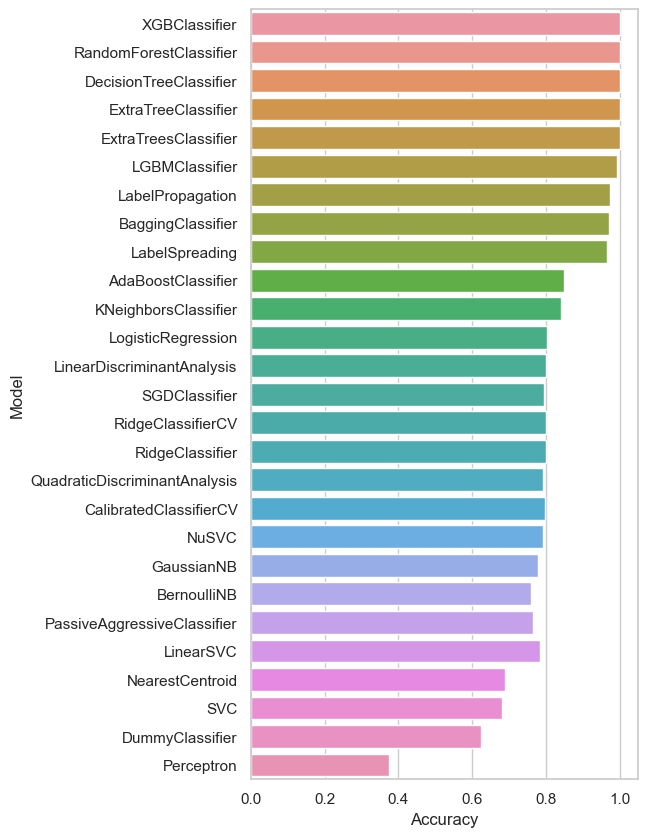

In [ ]:
# Plot of Accuracy level vs type of classifier on TRAIN DATASET

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'XGBClassifier'),
  Text(1, 0, 'RandomForestClassifier'),
  Text(2, 0, 'DecisionTreeClassifier'),
  Text(3, 0, 'ExtraTreeClassifier'),
  Text(4, 0, 'ExtraTreesClassifier'),
  Text(5, 0, 'LGBMClassifier'),
  Text(6, 0, 'LabelPropagation'),
  Text(7, 0, 'BaggingClassifier'),
  Text(8, 0, 'LabelSpreading'),
  Text(9, 0, 'AdaBoostClassifier'),
  Text(10, 0, 'KNeighborsClassifier'),
  Text(11, 0, 'LogisticRegression'),
  Text(12, 0, 'LinearDiscriminantAnalysis'),
  Text(13, 0, 'SGDClassifier'),
  Text(14, 0, 'RidgeClassifierCV'),
  Text(15, 0, 'RidgeClassifier'),
  Text(16, 0, 'QuadraticDiscriminantAnalysis'),
  Text(17, 0, 'CalibratedClassifierCV'),
  Text(18, 0, 'NuSVC'),
  Text(19, 0, 'GaussianNB'),
  Text(20, 0, 'BernoulliNB'),
  Text(21, 0, 'PassiveAggressiveClassifier'),
  Text(22, 0, 'LinearSVC'),
  Text(23, 0, 'NearestCentroid'),
  Text(24, 0, 'S

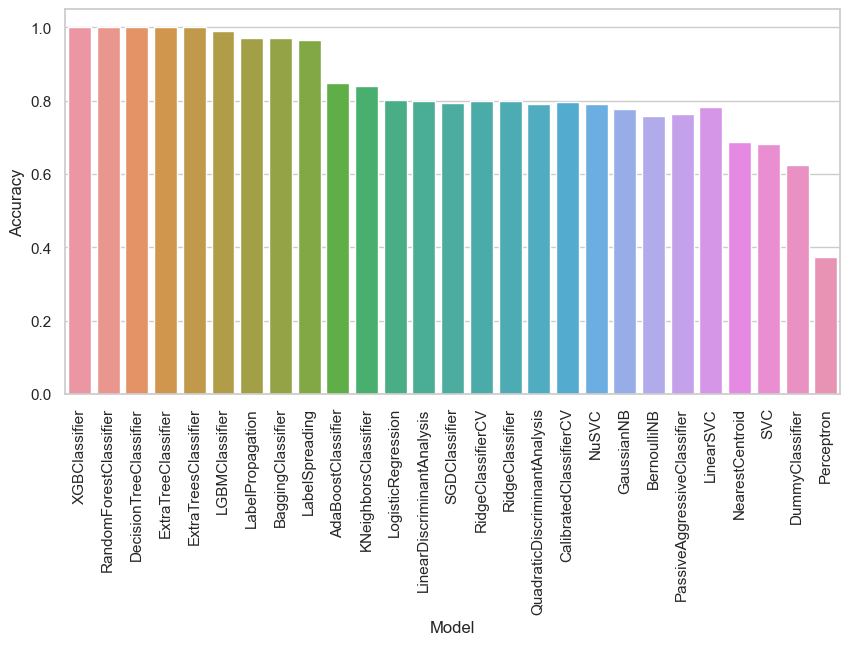

In [ ]:
# Plot of Accuracy level vs type of classifier on TRAIN DATASET 

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

In [ ]:
# Now we will proceed to test our model using the TITANIC TEST DATASET. 
# These are the DATASET our model has never seen before & being asked to predict 
# whether these 418 people in the TEST DATASET will survive or not.?
XtestDF  = test_df
XtestDF

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived
0,892,3,0,22,0,0,7,NaN,0
1,893,3,1,38,1,0,7,NaN,0
2,894,2,0,26,0,0,9,NaN,0
3,895,3,0,35,0,0,8,NaN,0
4,896,3,1,35,1,1,12,NaN,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,36,0,0,8,NaN,0
414,1306,1,1,44,0,0,108,C105,1
415,1307,3,0,40,0,0,7,NaN,0
416,1308,3,0,34,0,0,8,NaN,0


In [ ]:
ytestDF = test_df.Survived
ytestDF

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
# Data split. in this case, I split the test set at 90% for testing. Because the aim here is to use this TEST DATASET 
# to test our model. But this model require test size between 0 to 1. so I choose the maximum of 0.1 = 90% 
XtestDF_train, XtestDF_test, ytestDF_train, ytestDF_test = train_test_split(XtestDF, ytestDF, test_size=.9,random_state =42)

In [ ]:
# Defines and builds the lazyclassifier. Just the same as the training model parameters. But now using TEST DATASET.

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(XtestDF_train, XtestDF_train, ytestDF_train, ytestDF_train)
models_test,predictions_test = clf.fit(XtestDF_train, XtestDF_test, ytestDF_train, ytestDF_test)

# Prints the model performance
models_train

#Result: 100% accuracy on TEST dataset

100%|██████████| 29/29 [00:01<00:00, 23.47it/s]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:01<00:00, 23.33it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.04
BaggingClassifier,1.00,1.00,1.00,1.00,0.06
XGBClassifier,1.00,1.00,1.00,1.00,0.06
SVC,1.00,1.00,1.00,1.00,0.02
SGDClassifier,1.00,1.00,1.00,1.00,0.02
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.03
RidgeClassifier,1.00,1.00,1.00,1.00,0.03
RandomForestClassifier,1.00,1.00,1.00,1.00,0.23
Perceptron,1.00,1.00,1.00,1.00,0.02


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'AdaBoostClassifier'),
  Text(1, 0, 'BaggingClassifier'),
  Text(2, 0, 'XGBClassifier'),
  Text(3, 0, 'SVC'),
  Text(4, 0, 'SGDClassifier'),
  Text(5, 0, 'RidgeClassifierCV'),
  Text(6, 0, 'RidgeClassifier'),
  Text(7, 0, 'RandomForestClassifier'),
  Text(8, 0, 'Perceptron'),
  Text(9, 0, 'PassiveAggressiveClassifier'),
  Text(10, 0, 'NearestCentroid'),
  Text(11, 0, 'LogisticRegression'),
  Text(12, 0, 'LinearSVC'),
  Text(13, 0, 'LinearDiscriminantAnalysis'),
  Text(14, 0, 'LabelSpreading'),
  Text(15, 0, 'LabelPropagation'),
  Text(16, 0, 'GaussianNB'),
  Text(17, 0, 'ExtraTreesClassifier'),
  Text(18, 0, 'ExtraTreeClassifier'),
  Text(19, 0, 'DecisionTreeClassifier'),
  Text(20, 0, 'CalibratedClassifierCV'),
  Text(21, 0, 'BernoulliNB'),
  Text(22, 0, 'KNeighborsClassifier'),
  Text(23, 0, 'QuadraticDiscriminantAnalysis'),
  Text(24, 0, 'DummyClassi

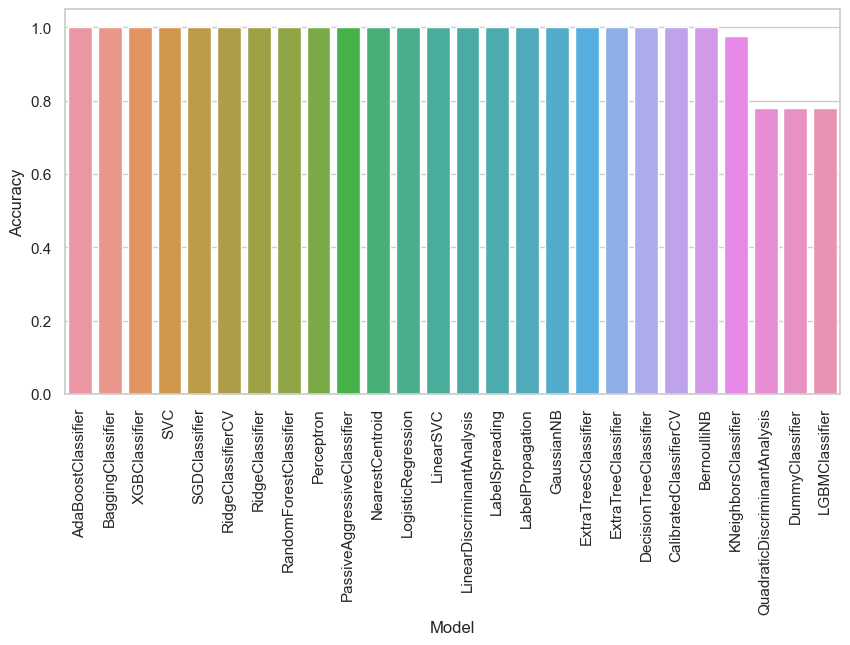

In [ ]:
# Plot of Accuracy level vs type of classifier on TEST DATASET 90% rotation

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="Accuracy", data=models_train)
plt.xticks(rotation=90)

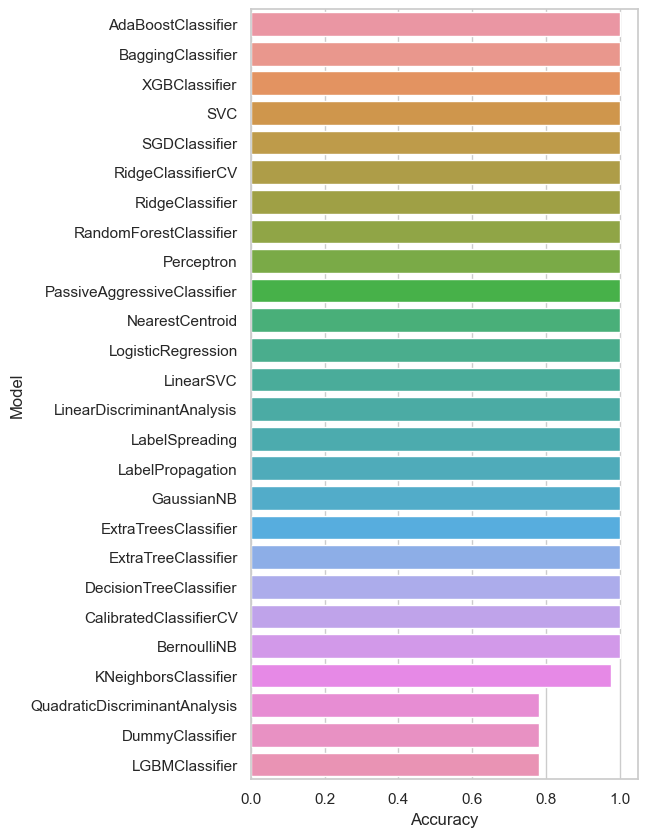

In [ ]:
# Plot of Accuracy level vs type of classifier on TEST DATASET

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)

In [ ]:
# Want to add/insert a column 'Survived' next to PassengerId in the TEST DATASET. But no need since the model reached 100% accurate
# ytestDF = pd.DataFrame(ytestDF)
# ytestDF.insert(2, "Survived", ["len"==418], True)